### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

d:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
sns.set_style('whitegrid')

In [3]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 100000

In [4]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [5]:
pct_to_target[0:10]

array([[1.06254828, 1.07225627, 0.93447678, ..., 1.08201289, 0.98733882,
        1.00924356],
       [0.8457968 , 1.07538319, 0.94959208, ..., 1.06691059, 1.02183043,
        1.17755068],
       [1.1499772 , 1.07288854, 0.95381994, ..., 0.89909599, 0.91937043,
        1.06639011],
       ...,
       [1.21122691, 1.01817498, 0.95804291, ..., 0.92167981, 0.95651557,
        1.00282952],
       [0.82001915, 1.00580782, 0.97974483, ..., 1.01224238, 0.87128396,
        0.85373304],
       [1.08872338, 1.13693689, 1.02261026, ..., 1.03278401, 1.13418577,
        0.94805483]])

In [6]:
# Another example for the sales target distribution
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [7]:
sales_target[0:10]

array([[100000, 400000, 100000, ..., 100000, 200000, 100000],
       [ 75000, 200000,  75000, ..., 100000, 200000,  75000],
       [300000, 300000,  75000, ...,  75000, 100000,  75000],
       ...,
       [300000, 100000,  75000, ..., 300000, 200000, 300000],
       [ 75000, 200000, 200000, ...,  75000, 200000, 100000],
       [ 75000, 200000, 100000, ...,  75000, 100000, 400000]])

In [8]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [9]:
commission_percentages[0:10]

array([[0.04, 0.04, 0.03, ..., 0.04, 0.03, 0.04],
       [0.02, 0.04, 0.03, ..., 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.03, ..., 0.02, 0.03, 0.04],
       ...,
       [0.04, 0.04, 0.03, ..., 0.03, 0.03, 0.04],
       [0.02, 0.04, 0.03, ..., 0.04, 0.02, 0.02],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.03]])

In [10]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [11]:
total_commissions.std()

96586.62697990981

In [12]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,2750000.0
1,2868250.0
2,2833250.0
3,2907500.0
4,2653250.0


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

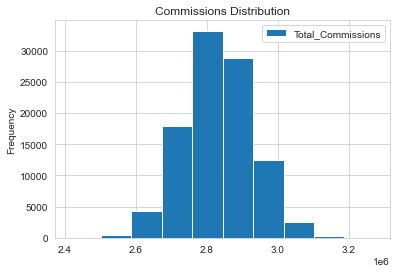

In [13]:
df.plot(kind='hist', title='Commissions Distribution')

In [14]:
df.describe()

,Total_Commissions
count,1.000000e+05
mean,2.831041e+06
std,9.658711e+04
min,2.415250e+06
25%,2.765250e+06
50%,2.829750e+06
75%,2.895750e+06
max,3.273250e+06
